In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import cv2

#keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import sklearn.metrics as metrics
train = pd.read_csv("/content/drive/My Drive/handwriiten characters/dataset/emnist-balanced-train.csv")
test = pd.read_csv("/content/drive/My Drive/handwriiten characters/dataset/emnist-balanced-test.csv")
mapp=pd.read_csv("/content/drive/My Drive/handwriiten characters/map.txt", delimiter = ' ',index_col=0, header=None, squeeze=True)
#print (mapp)

HEIGHT = 28
WIDTH = 28

train_xn = train.iloc[:,1:]
train_y = train.iloc[:,0]
del train

test_xn = test.iloc[:,1:]
test_y = test.iloc[:,0]
del test

# Flip and rotate the image

def rotate(image):
    image = image.reshape([HEIGHT, WIDTH])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

# Convert all the traing and testing sets to numpy array 

train_xn = np.asarray(train_xn)
train_xn = np.apply_along_axis(rotate, 1, train_xn)
print ("train_x:",train_xn.shape)
print("train_y:",train_y.shape)

test_xn = np.asarray(test_xn)
test_xn = np.apply_along_axis(rotate, 1, test_xn)
print ("test_x:",test_xn.shape)
print("test_y:",test_y.shape)

# Normalization  of the train_x and test_x 

train_xn= train_xn.astype('float32')
train_xn /= 255
test_xn = test_xn.astype('float32')
test_xn /= 255


train_x: (112799, 28, 28)
train_y: (112799,)
test_x: (18799, 28, 28)
test_y: (18799,)


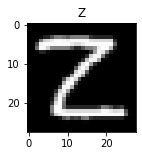

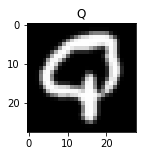

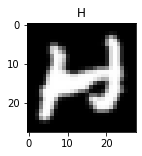

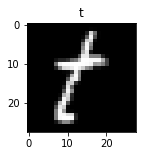

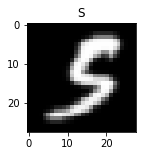

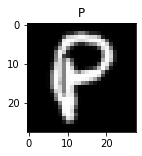

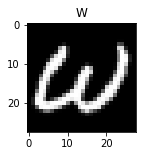

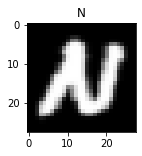

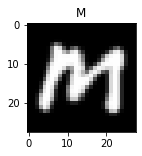

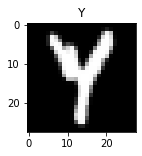

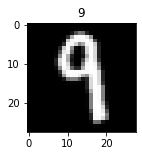

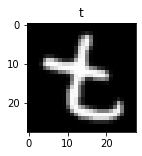

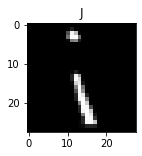

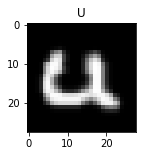

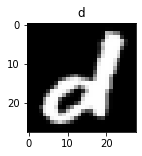

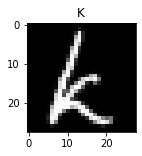

In [186]:

# To display the some images of the training dataset

from matplotlib import pyplot as plt
%matplotlib inline
for i in range (34,50):
  plt.figure(figsize=(2,2))
  plt.imshow(train_xn[i],cmap=plt.get_cmap('gray'))

  plt.title(chr(int(mapp[train_y[i]])))

In [187]:
# Number of classes 
num_classes = train_y.nunique()
print (num_classes)

# One-hot encoding :

train_y = np_utils.to_categorical(train_y, num_classes)
test_y = np_utils.to_categorical(test_y, num_classes)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

# Re-shaping of x traing and testing dataset 
train_x = train_xn.reshape(-1, HEIGHT, WIDTH, 1)
test_x = test_xn.reshape(-1, HEIGHT, WIDTH, 1)
print ("Size of an image :",train_x.shape)

# Splitting the traing dataset into 90 % training and 10 % validation dataset 
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size= 0.10, random_state=7)


47
train_y:  (112799, 47)
test_y:  (18799, 47)
Size of an image : (112799, 28, 28, 1)


In [188]:

# Compile the model

model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',input_shape=(HEIGHT, WIDTH,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=num_classes, activation='softmax'))

# architecture of the model 

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

Epoch 1/20
199/199 - 6s - loss: 1.6609 - accuracy: 0.5322 - val_loss: 0.5906 - val_accuracy: 0.8105
Epoch 2/20
199/199 - 6s - loss: 0.8042 - accuracy: 0.7473 - val_loss: 0.4822 - val_accuracy: 0.8377
Epoch 3/20
199/199 - 6s - loss: 0.6614 - accuracy: 0.7847 - val_loss: 0.4377 - val_accuracy: 0.8480
Epoch 4/20
199/199 - 6s - loss: 0.5941 - accuracy: 0.8060 - val_loss: 0.4008 - val_accuracy: 0.8601
Epoch 5/20
199/199 - 6s - loss: 0.5483 - accuracy: 0.8188 - val_loss: 0.3852 - val_accuracy: 0.8622
Epoch 6/20
199/199 - 5s - loss: 0.5163 - accuracy: 0.8265 - val_loss: 0.3721 - val_accuracy: 0.8675
Epoch 7/20
199/199 - 5s - loss: 0.4902 - accuracy: 0.8360 - val_loss: 0.3657 - val_accuracy: 0.8713
Epoch 8/20
199/199 - 5s - loss: 0.4681 - accuracy: 0.8419 - val_loss: 0.3596 - val_accuracy: 0.8699
Epoch 9/20
199/199 - 5s - loss: 0.4538 - accuracy: 0.8452 - val_loss: 0.3606 - val_accuracy: 0.8699
Epoch 10/20
199/199 - 5s - loss: 0.4384 - accuracy: 0.8493 - val_loss: 0.3506 - val_accuracy: 0.8738

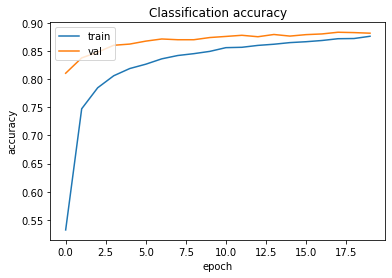

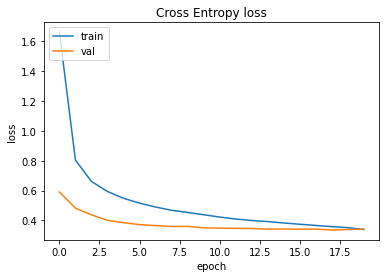

In [189]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=20, batch_size=512, verbose=2,validation_data=(val_x,val_y))

# Plotting 

# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()





In [190]:
score = model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

y_pred = model.predict(test_x)
y_pred = (y_pred > 0.5)
#print (chr(int(mapp[train_y[58]])))


Test loss: 0.3573727309703827
Test accuracy: 0.8835576176643372


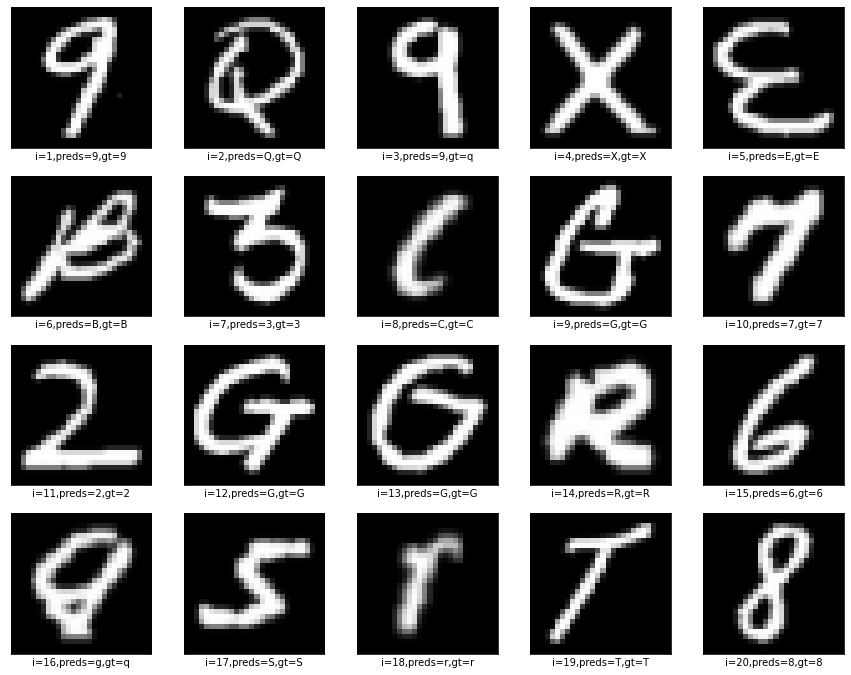

In [191]:
#Comparsion of the actual and predicted outcomes for the fisrt 20 testing sets 
import numpy as np
plt.figure(figsize=(15,15))
start=1
for i in range (20):
  plt.subplot(5,5,i+1)
  #plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  preds=np.argmax(y_pred[start+i])
  #print (preds)
  gt=test_y[start+i]
  ok=np.where(gt == 1)[0][0]
  #print (chr(int(mapp[ok])))
  col='g'
  if preds!= ok :
    col='r'       
  plt.xlabel ('i={},preds={},gt={}'.format(start+i,chr(int(mapp[preds])),chr(int(mapp[ok]))))
  plt.imshow(test_xn[start+i],cmap=plt.get_cmap('gray'))
plt.show() 



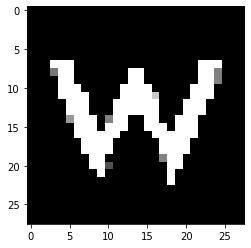

W


In [192]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
# opencv loads the image in BGR, convert it to RGB
img = cv2.cvtColor(cv2.imread('/content/drive/My Drive/handwriiten characters/Images/w.jpg'),cv2.COLOR_BGR2RGB)                  
lower_white = np.array([255, 255, 255], dtype=np.uint8)
upper_white = np.array([255, 255, 255], dtype=np.uint8)
mask = cv2.inRange(img, lower_white, upper_white)  # could also use threshold
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))  # "erase" the small white points in the resulting mask
mask = cv2.bitwise_not(mask)  # invert mask
# load background (could be an image too)
bk = np.full(img.shape, 0, dtype=np.uint8)  # white bk
# get masked foreground
fg_masked = cv2.bitwise_and(img, img, mask=mask)
# get masked background, mask must be inverted 
mask = cv2.bitwise_not(mask)
bk_masked = cv2.bitwise_and(img,img, mask=mask)
# combine masked foreground and masked background 
final = cv2.bitwise_or(fg_masked, bk_masked)
mask = cv2.bitwise_not(mask)
  # revert mask to original
mask = cv2.resize(mask, (28, 28))
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(mask,cmap='binary')
plt.show()
mask=mask[None:]
#print (img.shape)
mask_n=mask.reshape(-1, 28, 28, 1)
cles =model.predict(mask_n)
preds=np.argmax(cles[0])
print (chr(int(mapp[preds])))